# An Attempt to Predict lowest possible CRS for Canadian Immigration Programs

* Thanks to <a href="https://www.kaggle.com/code/umerkk12/canadian-immigration-analysis-directly-from-web">UMERKK12 </a></h5> for EDA work got to learn very well <h5>

In [815]:
# Run after taining the model
print(f'MAE : {mean_absolute_error(y_test,predictions)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,predictions))}')


MAE : 37.00469970703125
RMSE : 60.864654480159956


In [753]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings 
warnings.filterwarnings('ignore')

In [754]:
df = pd.read_csv('Canadian Immigration Dataset.csv', index_col=0)

In [755]:
df.head(3)

,Draw Number,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,Date (hidden),Programs covered,Month,Year,month_year,Date Full
0,172,1/7/2021,Canadian Experience Class,4750,461,7/1/2021,Canadian Experience Class,1,2021,1/1/2021,7-Jan-21
1,171,1/6/2021,Provincial Nominee Program,250,813,6/1/2021,Provincial Nominee Program,1,2021,1/1/2021,6-Jan-21
2,170,12/23/2020,No program specified,5000,468,12/23/2020,Canadian Experience Class Federal Skilled Wor...,12,2020,12/1/2020,23-Dec-20


In [756]:
df['Immigration program'].unique()

array(['Canadian Experience Class', 'Provincial Nominee Program',
       'No program specified', 'Federal Skilled Trades'], dtype=object)

* By observing the data we interpret there is some immigration program with "No program specified" which can be treated a null values   but as it will be the essential feature for our model we just picked random program from  offered programs.

In [757]:
df['Programs covered'].unique()

array(['Canadian Experience Class', 'Provincial Nominee Program',
       'Canadian Experience Class  Federal Skilled Worker Program  Federal Skilled Worker Program  Provincial Nominee Program',
       'Federal Skilled Trades'], dtype=object)

In [758]:
#df['Programs covered'] = df['Programs covered'].apply(lambda x: x.split('  '))

In [759]:
'''d = []
for i in df['Programs covered'].values:
    if len(i) < 1:
        pass
    else:
        random.shuffle(i)
    d.append(i)
df['Programs covered'] = d'''

"d = []\nfor i in df['Programs covered'].values:\n    if len(i) < 1:\n        pass\n    else:\n        random.shuffle(i)\n    d.append(i)\ndf['Programs covered'] = d"

In [760]:
'''for i in df['Immigration program']:
    if i == 'No program specified':
        for j in df['Programs covered']:
            if len(j) > 1:
                pass
            else:
                i.replace('No program specified',j[0] )
pp = []
for i in df["Programs covered"].values:
    pp.append(i[0])'''

'for i in df[\'Immigration program\']:\n    if i == \'No program specified\':\n        for j in df[\'Programs covered\']:\n            if len(j) > 1:\n                pass\n            else:\n                i.replace(\'No program specified\',j[0] )\npp = []\nfor i in df["Programs covered"].values:\n    pp.append(i[0])'

In [761]:
#df['Immigration program'] = pp

In [762]:
#as we have got immigration program for each invite we can drop the program covered and unneccesary date  columns
df.drop(['Programs covered', 'Date (hidden)','month_year','Date Full','Date'], axis=1, inplace=True)

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Draw Number                                   173 non-null    int64 
 1   Immigration program                           173 non-null    object
 2   Invitations issued                            173 non-null    int64 
 3   CRS score of lowest-ranked candidate invited  173 non-null    int64 
 4   Month                                         173 non-null    int64 
 5   Year                                          173 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Draw Number                                   173 non-null    int64 
 1   Immigration program                           173 non-null    object
 2   Invitations issued                            173 non-null    int64 
 3   CRS score of lowest-ranked candidate invited  173 non-null    int64 
 4   Month                                         173 non-null    int64 
 5   Year                                          173 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


* Categories
    * 'Canadian Experience Class':0, 
    * 'Federal Skilled Trades':1,
    * 'Federal Skilled Worker Program':2, 
    * 'Provincial Nominee Program':3

In [765]:
df.rename(columns={'Draw Number':'Dno','Immigration program':'IP','Invitations issued':'Invites',
           'CRS score of lowest-ranked candidate invited':'Lowest_CRS'}, inplace=True)

In [677]:
## Regression Problem Considering Lowest_CRS as Dependent Variable

In [766]:
df.isnull().sum()

Dno           0
IP            0
Invites       0
Lowest_CRS    0
Month         0
Year          0
dtype: int64

In [767]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021


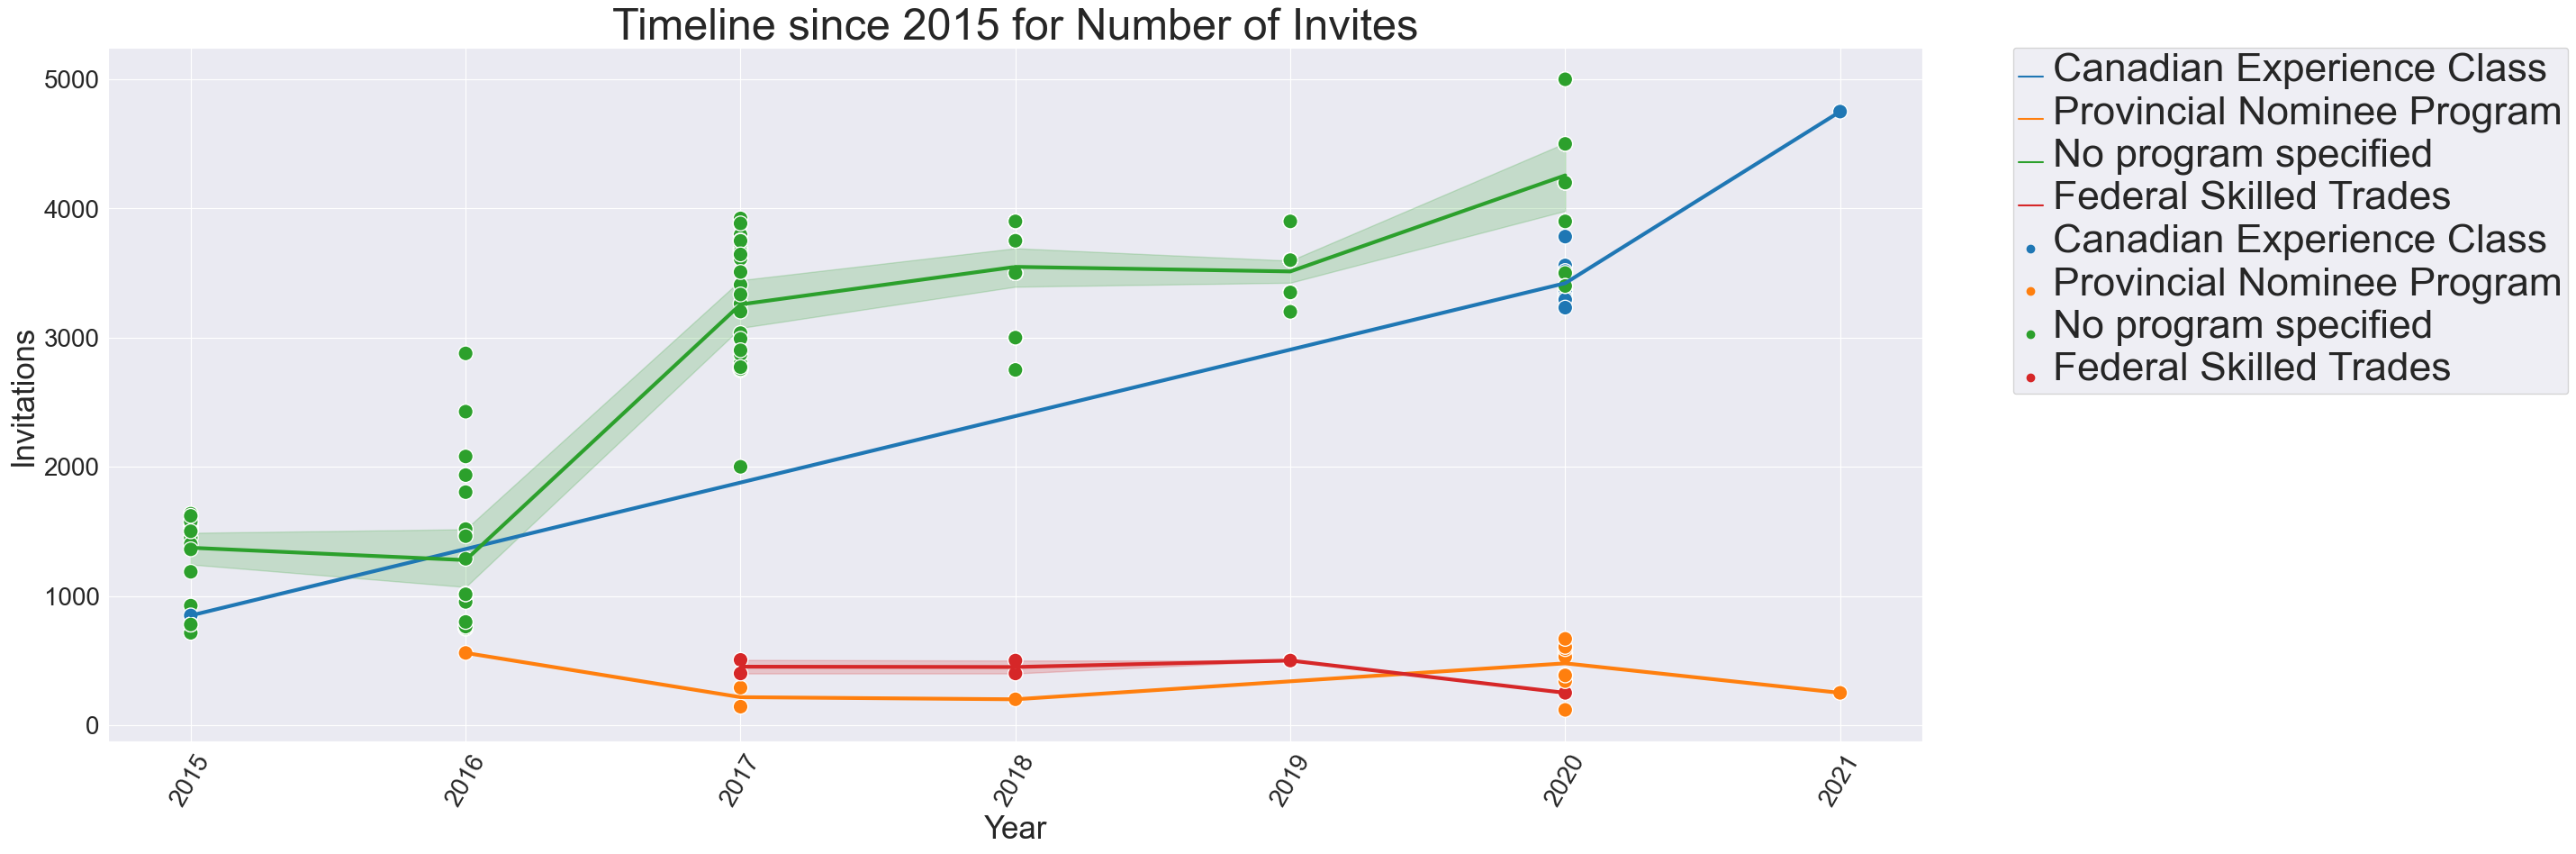

In [768]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Year', y= 'Invites', lw=3,data=df,hue='IP')
sns.scatterplot(x='Year', y= 'Invites', data=df, hue='IP', s=140)

g =plt.xticks(rotation=60)
s.set_xlabel('Year', fontsize=25)
s.set_ylabel('Invitations', fontsize=25)
s.set_title('Timeline since 2015 for Number of Invites', fontsize=35)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

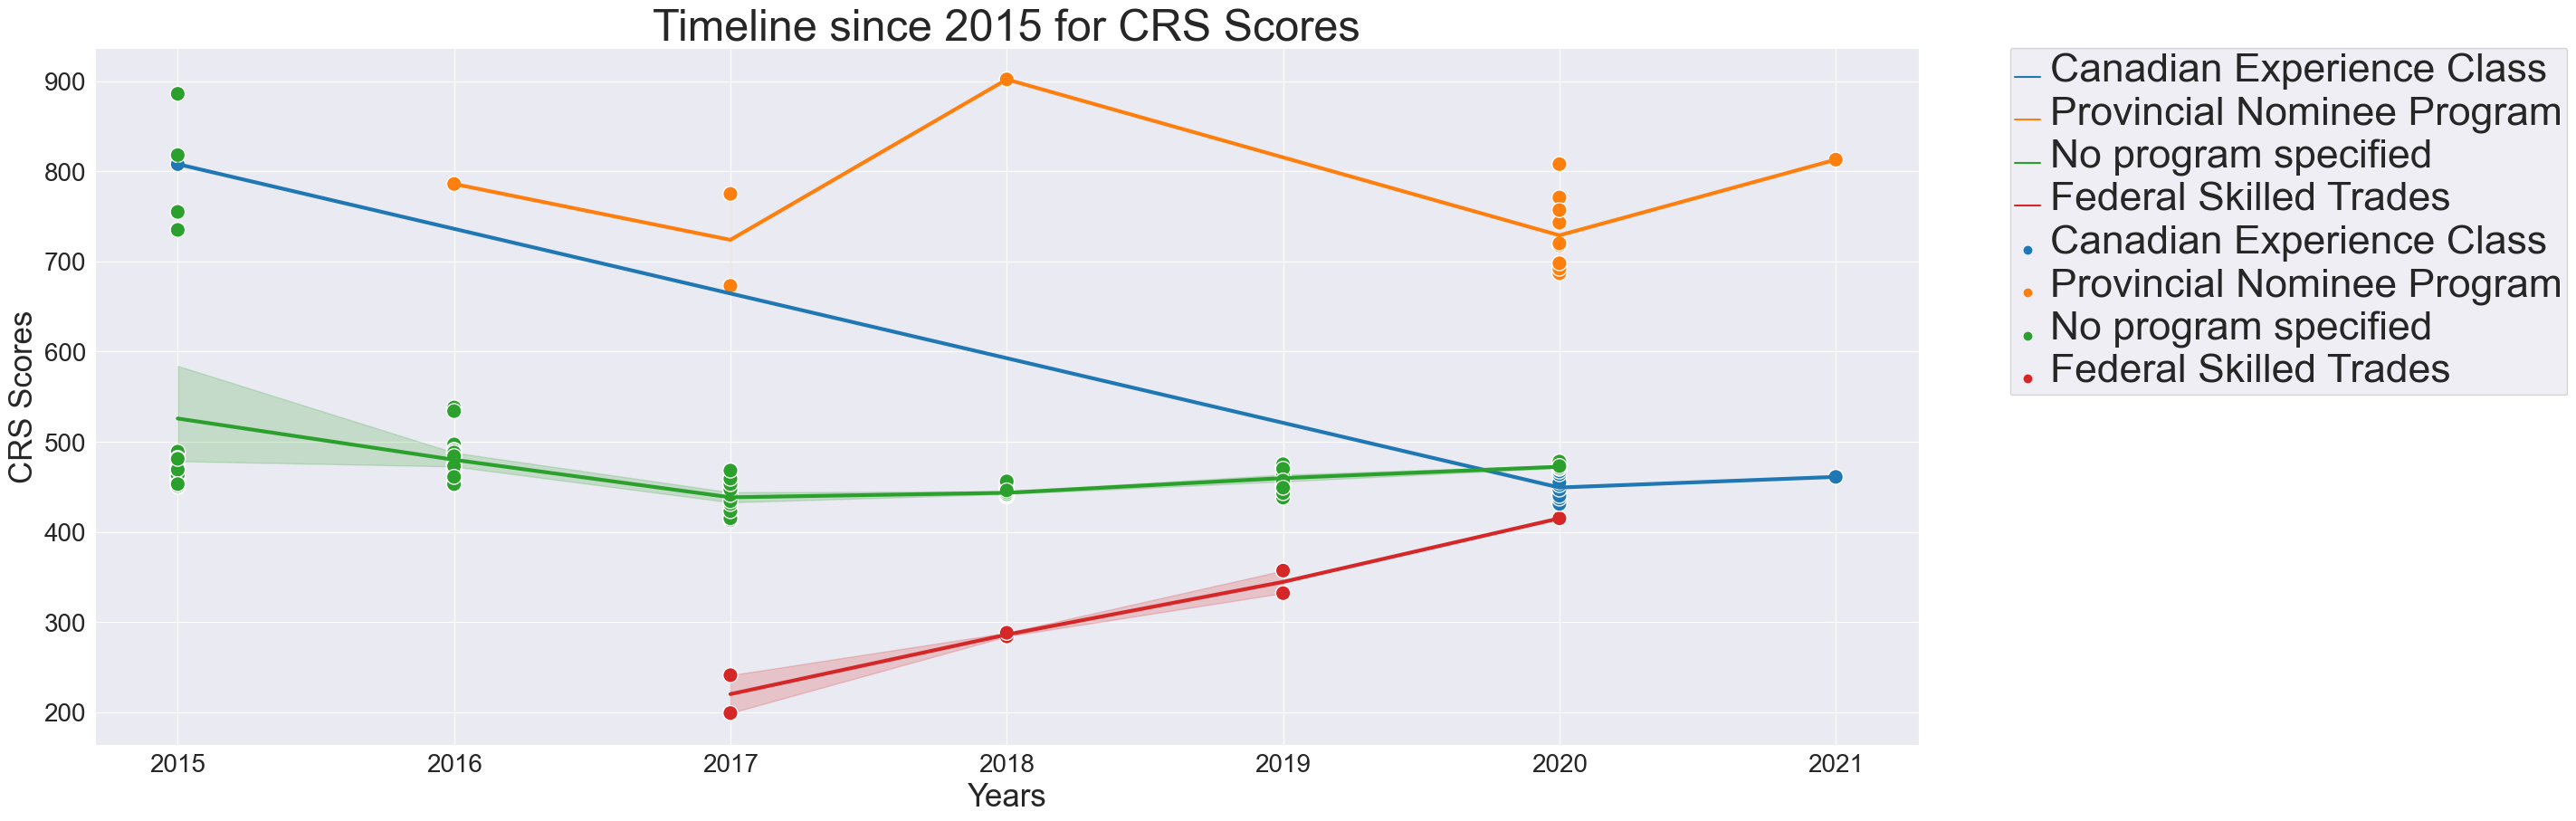

In [769]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Year', y= 'Lowest_CRS',lw=3, data=df, hue='IP')
sns.scatterplot(x='Year', y= 'Lowest_CRS', data=df, hue='IP', s=140)
g =plt.xticks(rotation=0)
s.set_xlabel('Years', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('Timeline since 2015 for CRS Scores', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

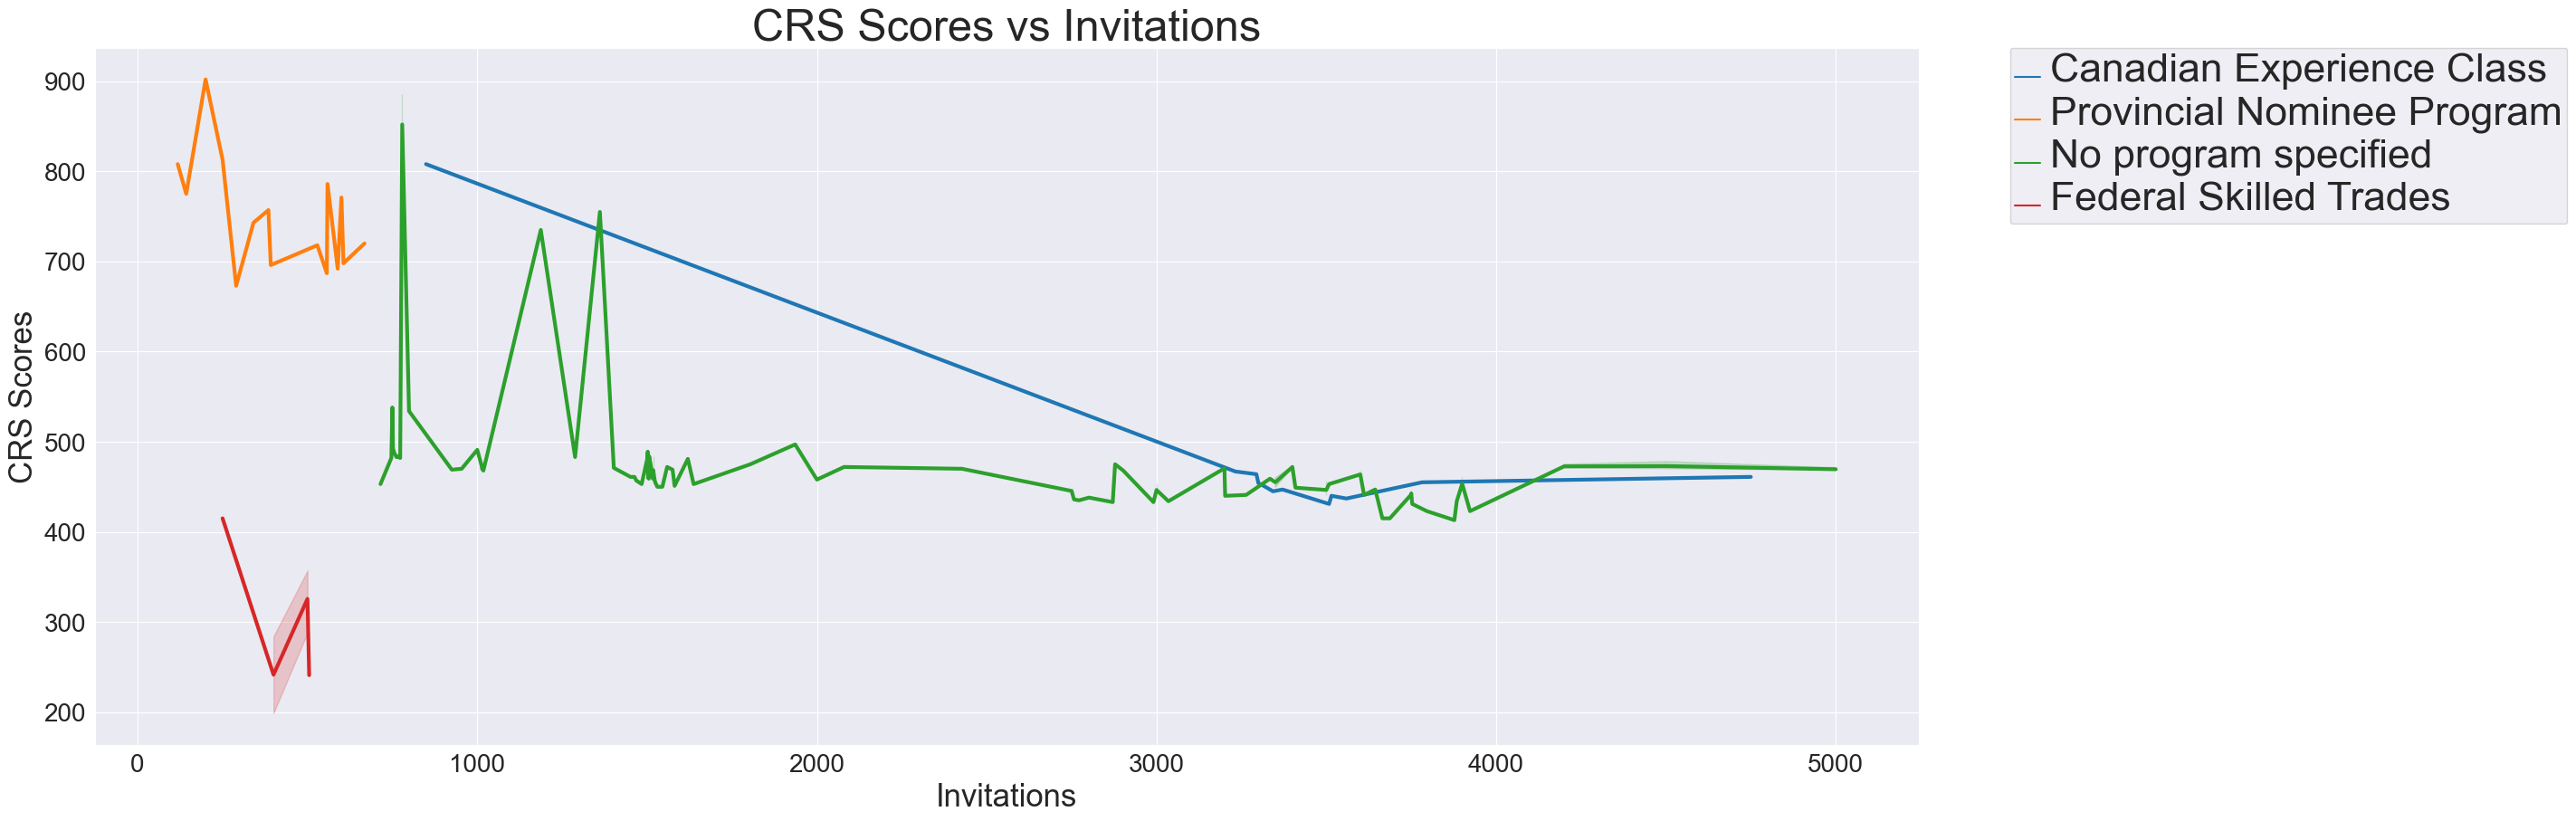

In [770]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Invites', y= 'Lowest_CRS',lw=3, data=df, hue='IP')
g =plt.xticks(rotation=0)
s.set_xlabel('Invitations', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('CRS Scores vs Invitations', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [771]:
df['IP'].unique()

array(['Canadian Experience Class', 'Provincial Nominee Program',
       'No program specified', 'Federal Skilled Trades'], dtype=object)

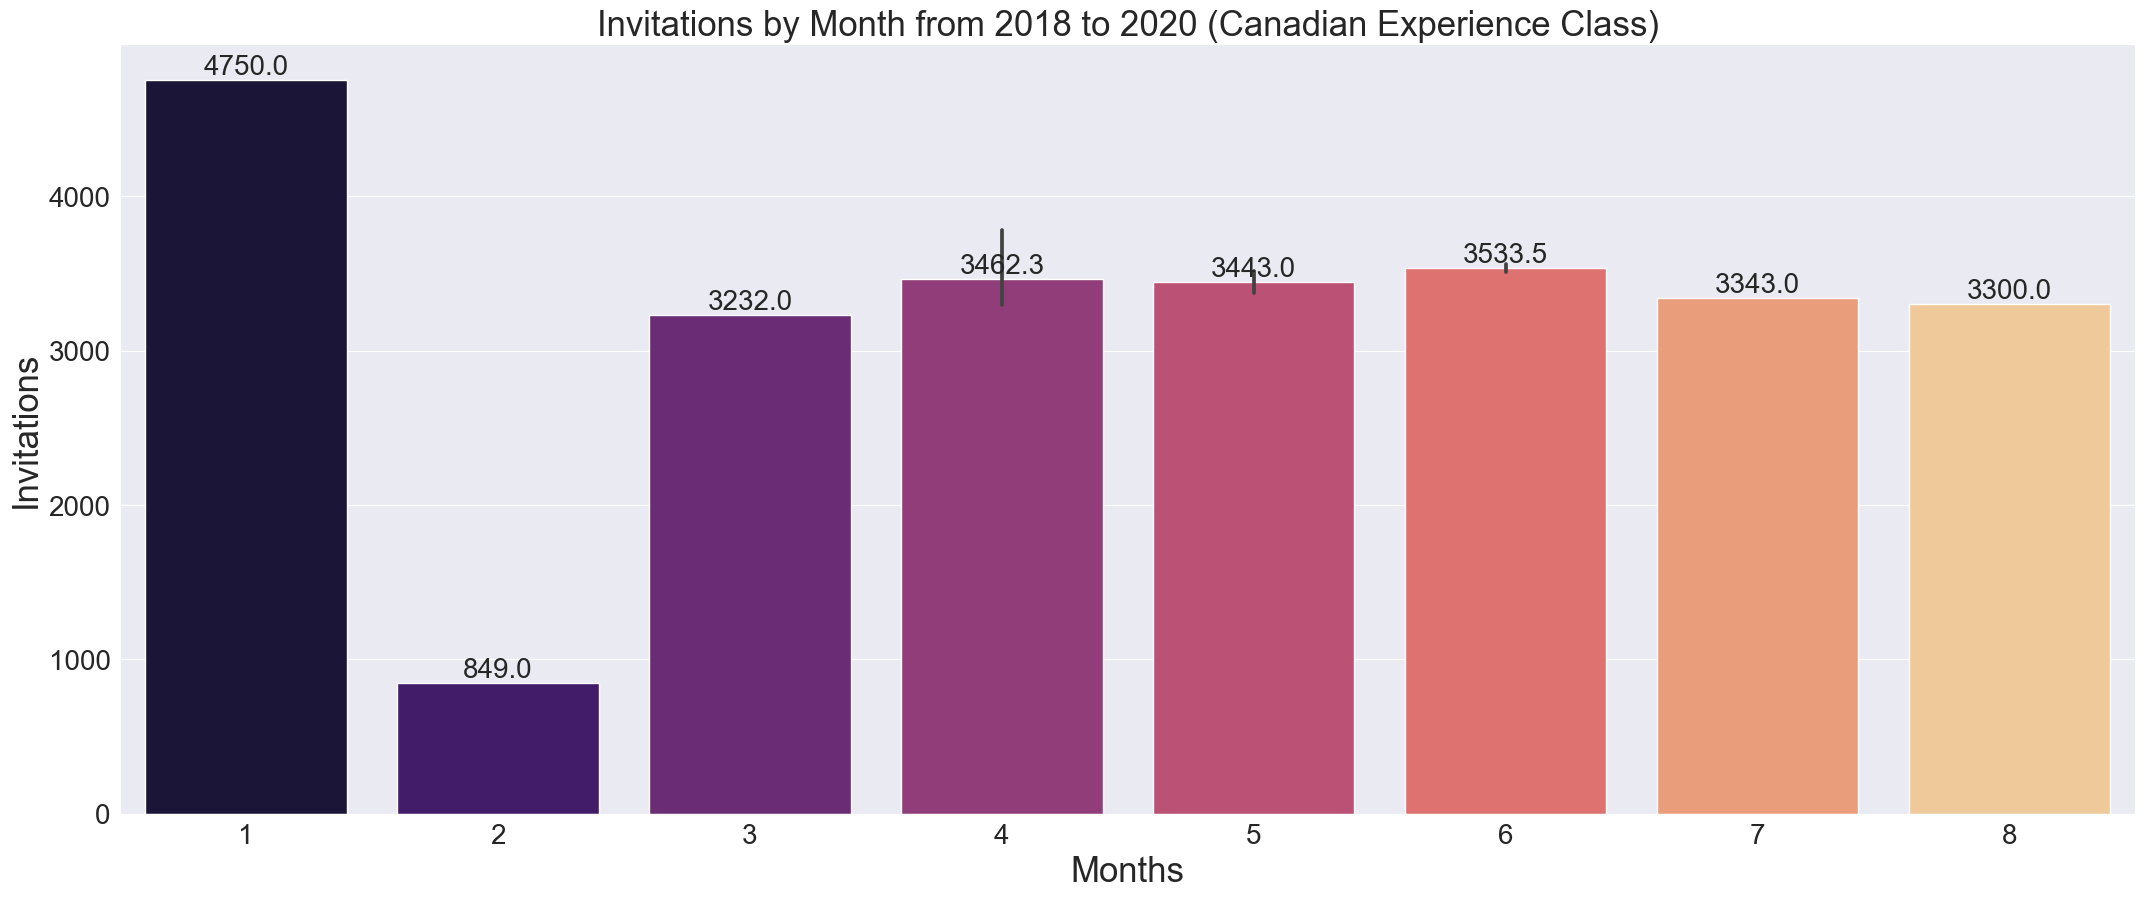

In [772]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Canadian Experience Class'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Canadian Experience Class)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

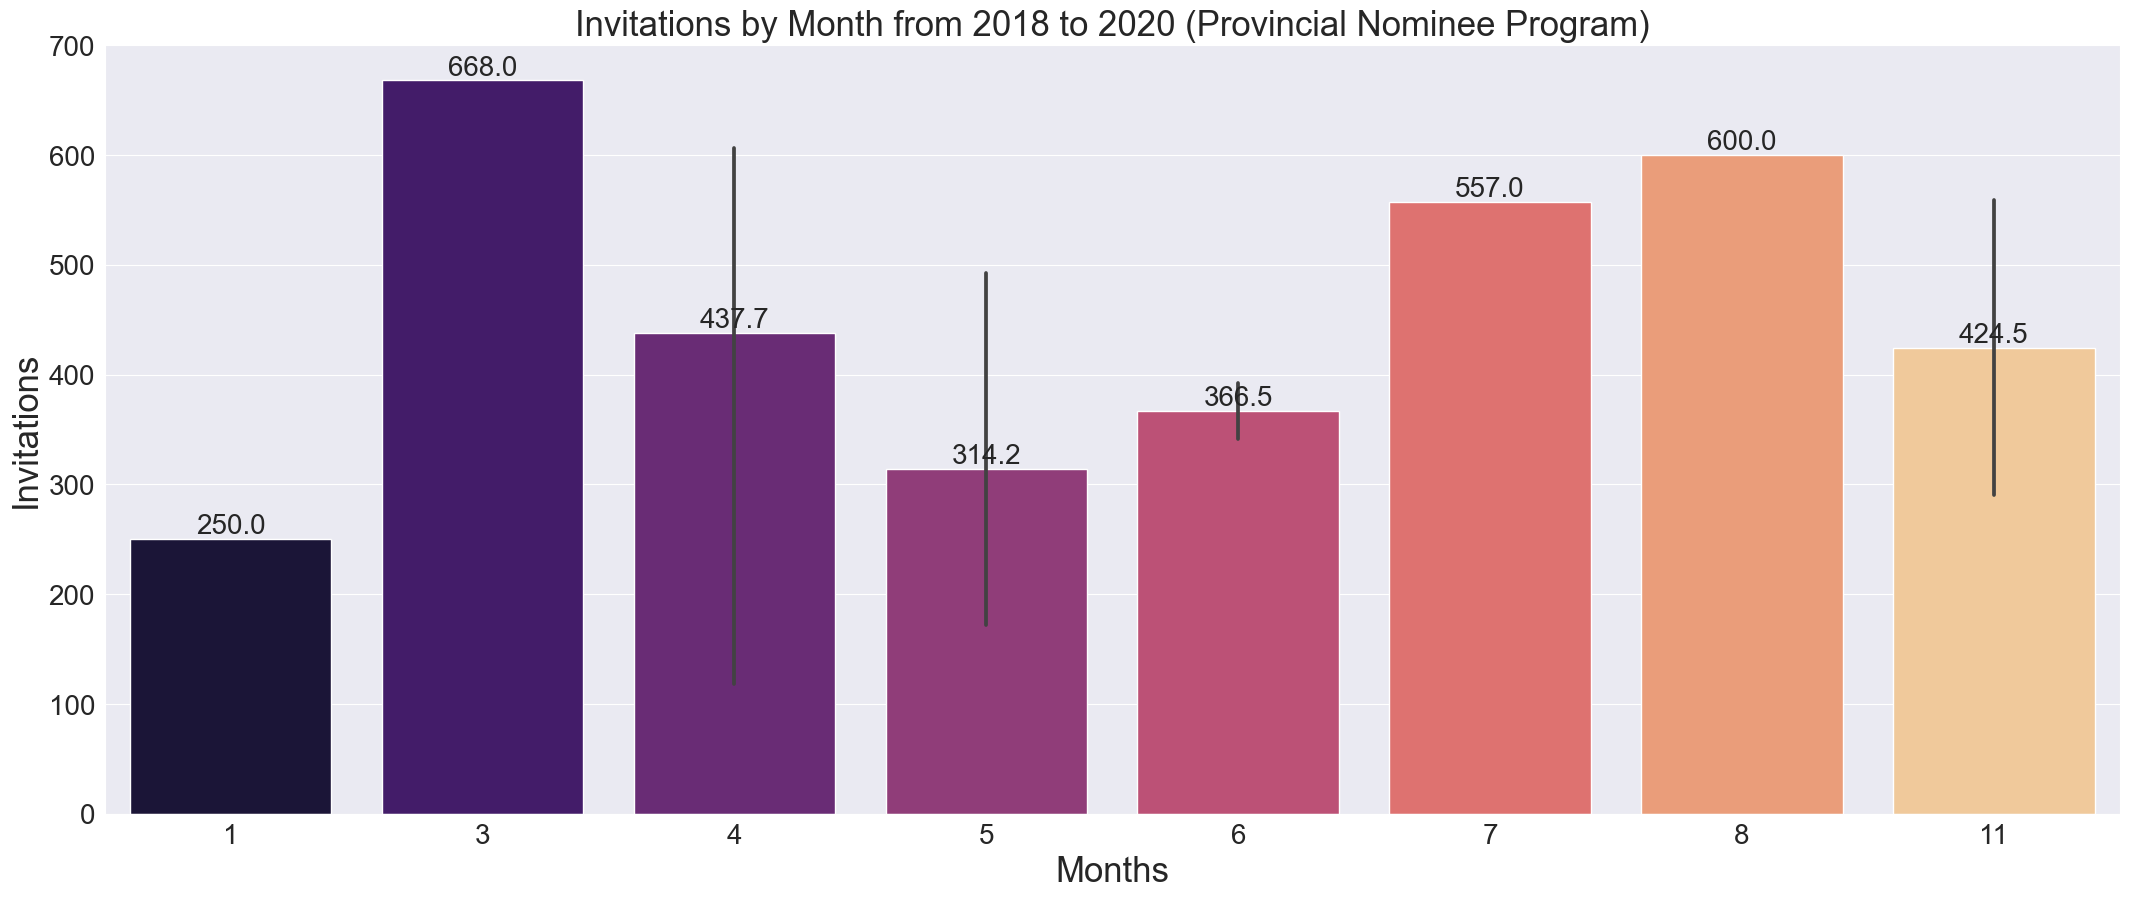

In [773]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Provincial Nominee Program'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Provincial Nominee Program)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [ ]:
df.head()

In [774]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Federal Skilled Worker Program'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.`1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Federal Skilled Worker Program)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

ValueError: min() arg is an empty sequence

<Figure size 2600x1000 with 0 Axes>

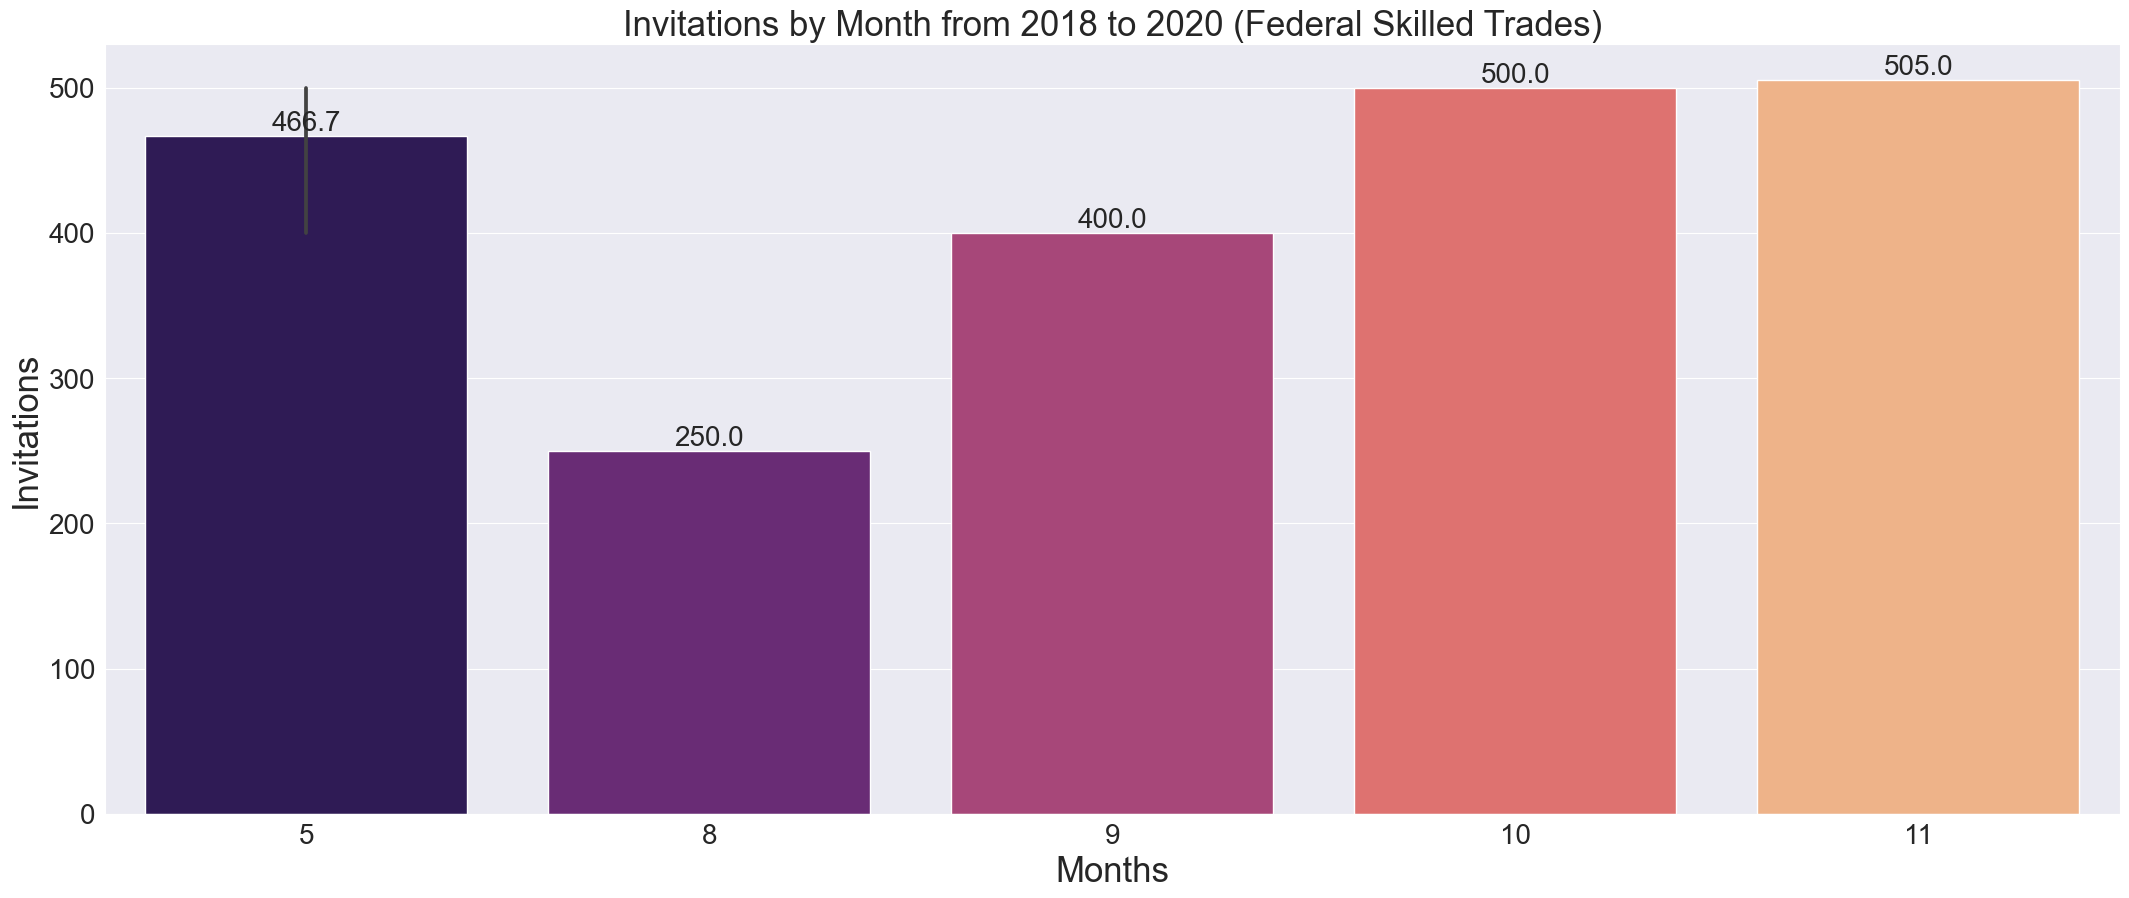

In [780]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Federal Skilled Trades'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Federal Skilled Trades)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [781]:
df_r = df.groupby('Month').mean().reset_index()
df_r.head()

,Month,Dno,Invites,Lowest_CRS,Year
0,1,83.375000,2713.875000,504.687500,2018.062500
1,2,60.333333,2534.083333,537.000000,2017.166667
2,3,76.615385,2570.538462,478.307692,2017.692308
3,4,89.411765,2373.705882,499.117647,2018.058824
4,5,89.315789,1975.052632,509.631579,2017.947368


(430.0, 500.0)

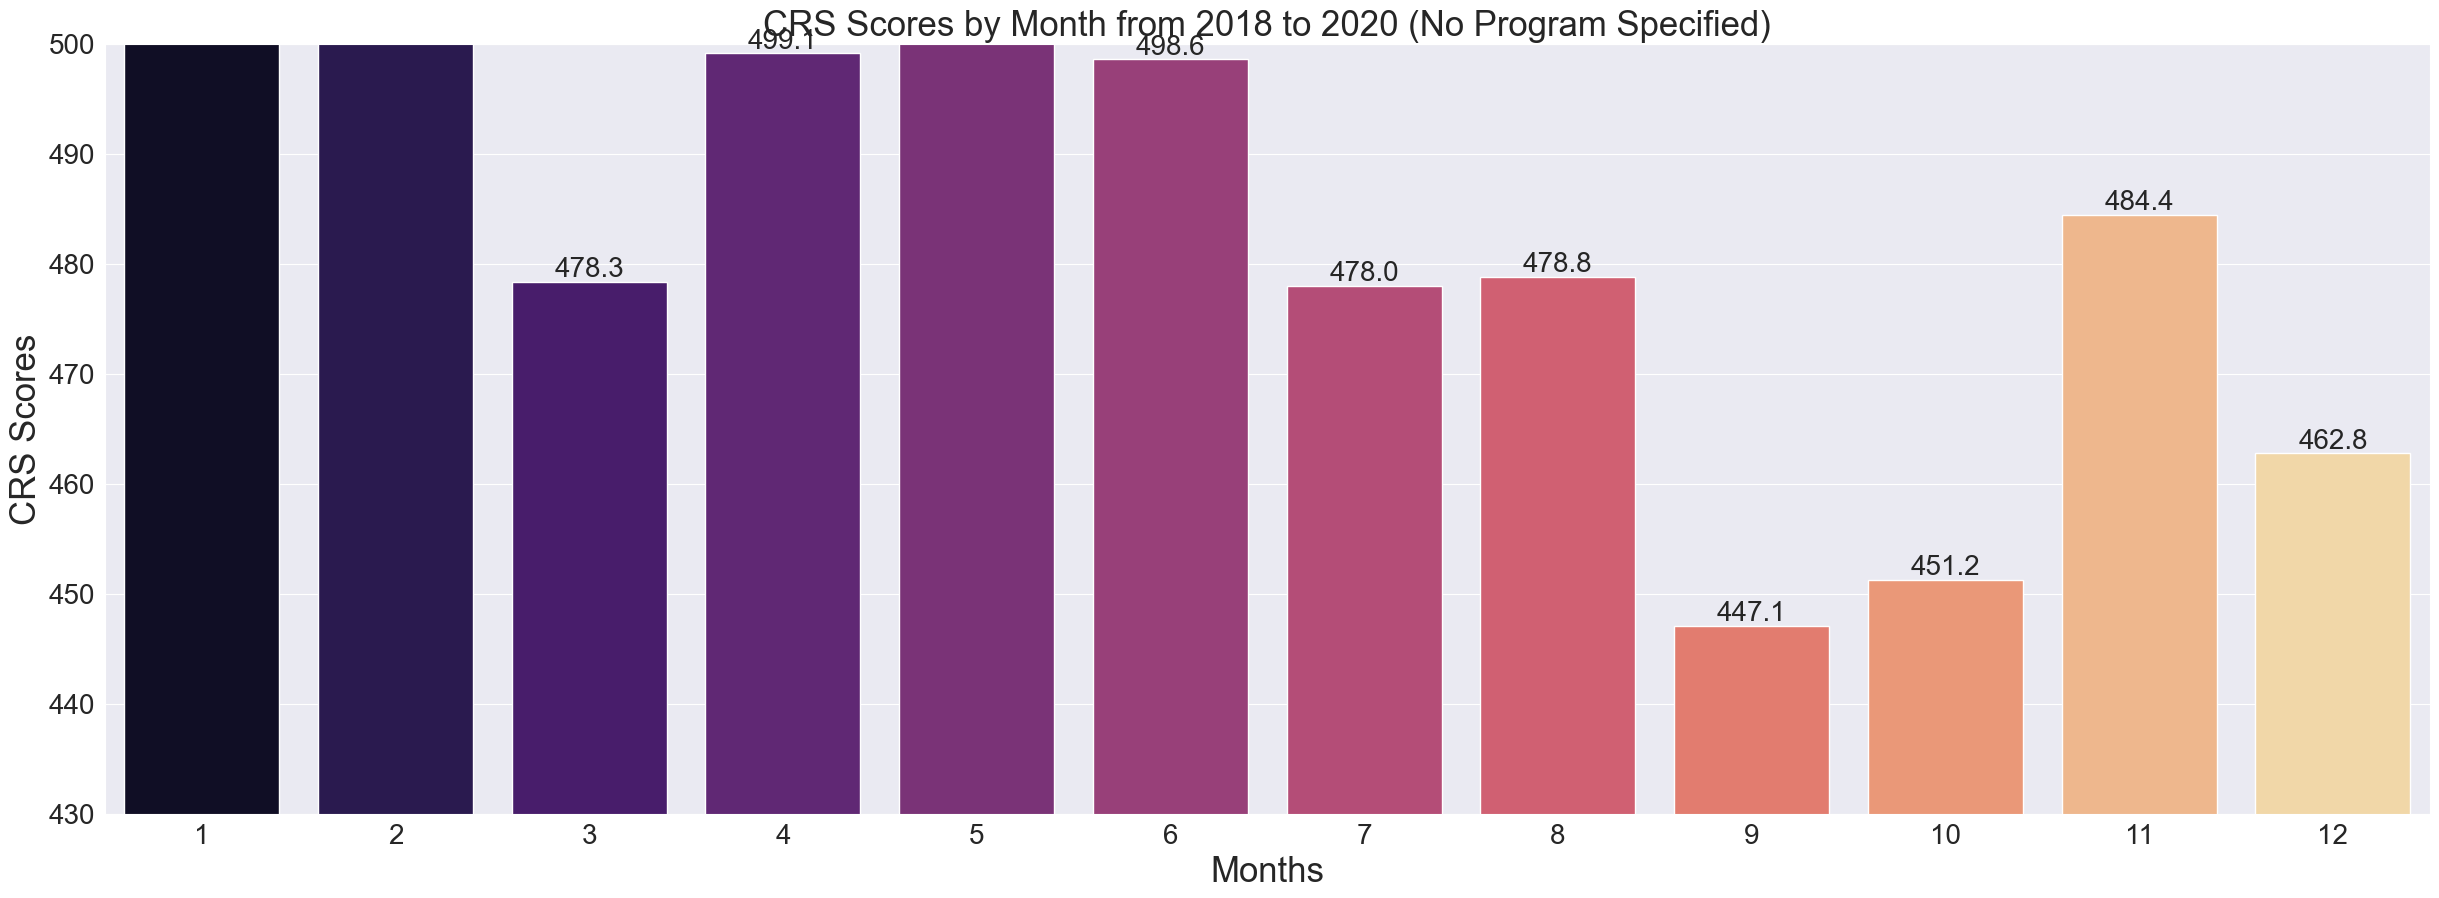

In [782]:
plt.figure(figsize=(30,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Lowest_CRS', data=df_r, palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')

g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('CRS Scores', fontsize=25)
f.set_title('CRS Scores by Month from 2018 to 2020 (No Program Specified)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)
plt.ylim(430,500)

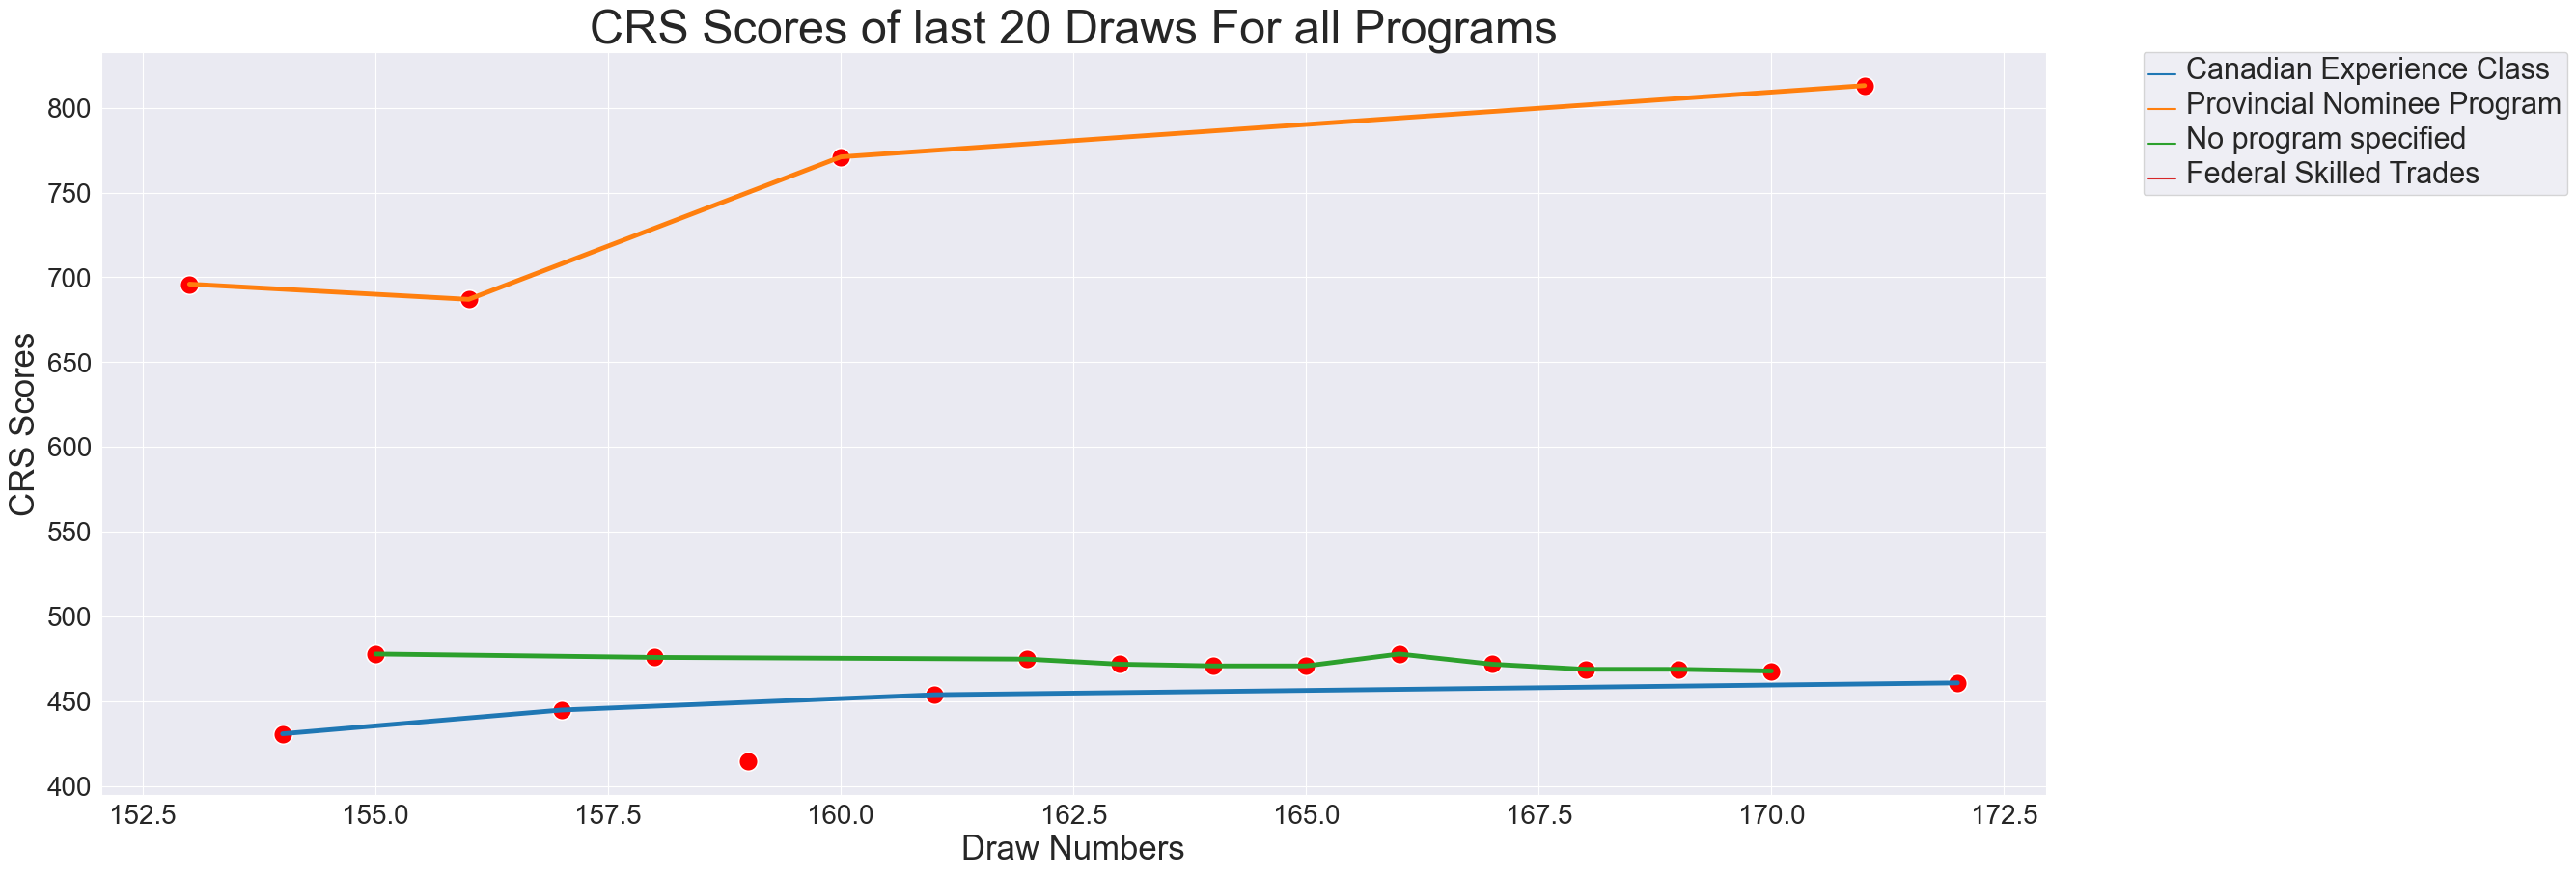

In [783]:
last_20_draws = df.iloc[:20]
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Dno', y= 'Lowest_CRS', data=last_20_draws, color='skyblue', lw=3.5, hue='IP')
s = sns.scatterplot(x='Dno', y= 'Lowest_CRS', data=last_20_draws, color='red', s=200)
g =plt.xticks(rotation=0)
s.set_xlabel('Draw Numbers', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('CRS Scores of last 20 Draws For all Programs', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='22') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

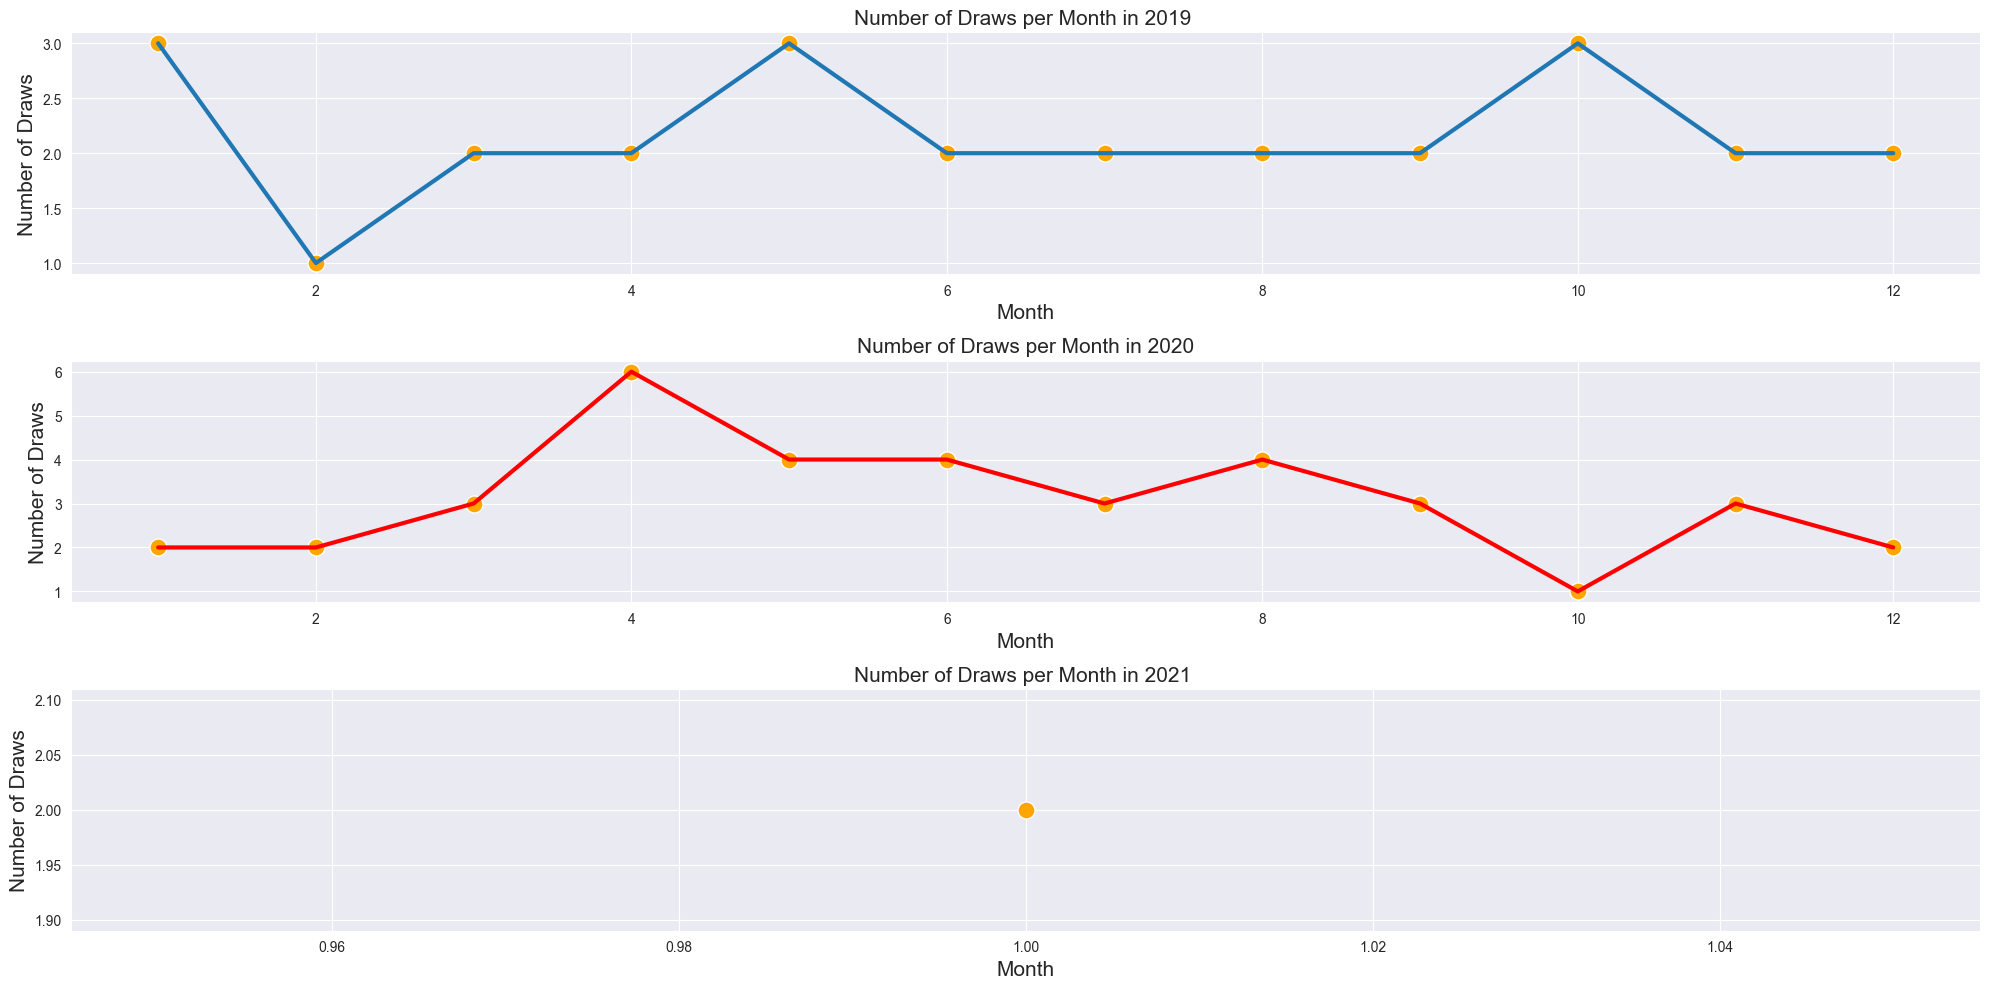

In [784]:
df_19 = df[df['Year'].isin([2019])].groupby('Month').count().reset_index()
df_20 = df[df['Year'].isin([2020])].groupby('Month').count().reset_index()
df_21 = df[df['Year'].isin([2021])].groupby('Month').count().reset_index()

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(20,10))
s = sns.lineplot(x='Month', y= 'Dno', data=df_19, ax=ax[0], lw=3)
s = sns.scatterplot(x='Month', y= 'Dno', data=df_19, ax=ax[0], color='orange', s=150)
s.set_xlabel('Month', fontsize=15)
s.set_ylabel('Number of Draws', fontsize=15)
s.set_title('Number of Draws per Month in 2019 ', fontsize=15)

w = sns.lineplot(x='Month', y= 'Dno', data=df_20, ax=ax[1], color='red', lw=3)
w = sns.scatterplot(x='Month', y= 'Dno', data=df_20, ax=ax[1], color='orange', s=150)
w.set_xlabel('Month', fontsize=15)
w.set_ylabel('Number of Draws', fontsize=15)
w.set_title('Number of Draws per Month in 2020', fontsize=15)

t = sns.lineplot(x='Month', y= 'Dno', data=df_21, ax=ax[2], color='green', lw=3)
t = sns.scatterplot(x='Month', y= 'Dno', data=df_21, ax=ax[2], color='orange', s=150)
t.set_xlabel('Month', fontsize=15)
t.set_ylabel('Number of Draws', fontsize=15)
t.set_title('Number of Draws per Month in 2021 ', fontsize=15)

plt.tight_layout()

In [785]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021


<AxesSubplot:xlabel='Lowest_CRS', ylabel='Density'>

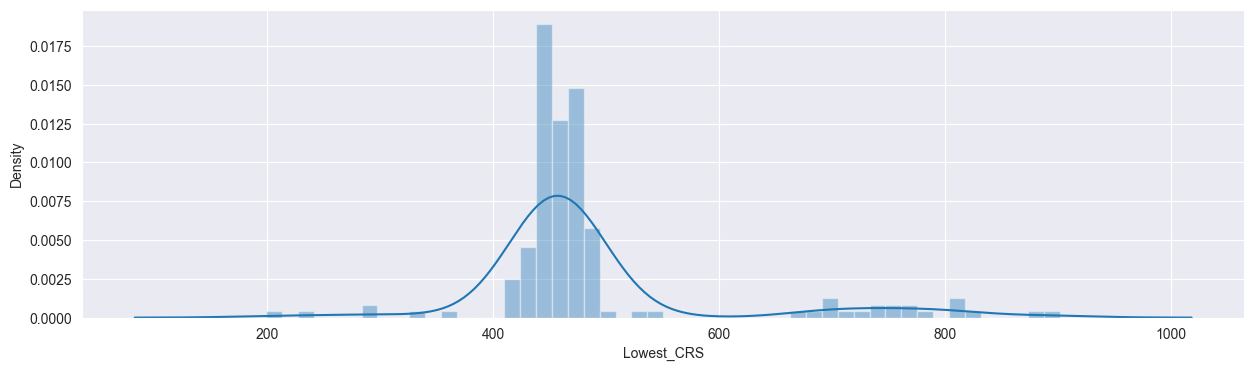

In [786]:
plt.figure(figsize=(15,4))
sns.distplot(df['Lowest_CRS'])

<AxesSubplot:xlabel='Invites', ylabel='Lowest_CRS'>

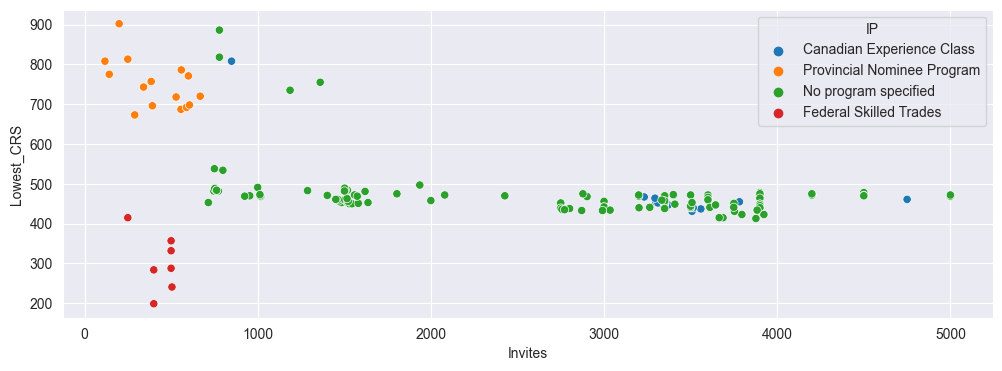

In [787]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Invites',y='Lowest_CRS',data=df, hue='IP')

<AxesSubplot:>

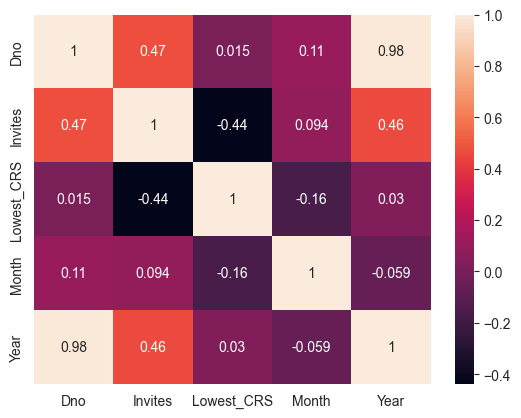

In [788]:
sns.heatmap(df.corr(), annot=True)

In [789]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021


In [790]:
df = df.astype({"IP":'category'})
df['IP'] = df['IP'].cat.codes

In [791]:
X = df.drop('Lowest_CRS',axis=1)
y = df['Lowest_CRS']

In [792]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [793]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [794]:
print(X_train.shape)
print(X_test.shape)

(121, 5)
(52, 5)


In [795]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [796]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [797]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=900)

Epoch 1/900
1/1 [==============================] - 1s 629ms/step - loss: 251133.9062 - val_loss: 243176.0000
Epoch 2/900
1/1 [==============================] - 0s 53ms/step - loss: 251099.1875 - val_loss: 243141.1562
Epoch 3/900
1/1 [==============================] - 0s 44ms/step - loss: 251068.3438 - val_loss: 243106.7344
Epoch 4/900
1/1 [==============================] - 0s 42ms/step - loss: 251032.5156 - val_loss: 243073.0625
Epoch 5/900
1/1 [==============================] - 0s 40ms/step - loss: 251003.7031 - val_loss: 243039.5312
Epoch 6/900
1/1 [==============================] - 0s 38ms/step - loss: 250975.2031 - val_loss: 243005.6875
Epoch 7/900
1/1 [==============================] - 0s 42ms/step - loss: 250933.1094 - val_loss: 242971.5781
Epoch 8/900
1/1 [==============================] - 0s 38ms/step - loss: 250908.0938 - val_loss: 242936.6719
Epoch 9/900
1/1 [==============================] - 0s 40ms/step - loss: 250865.7500 - val_loss: 242900.9688
Epoch 10/900
1/1 [=========

In [798]:
loss_df = pd.DataFrame(model.history.history, columns=['loss', 'val_loss'])
loss_df.head(2)

,loss,val_loss
0,251133.90625,243176.00000
1,251099.18750,243141.15625


<AxesSubplot:>

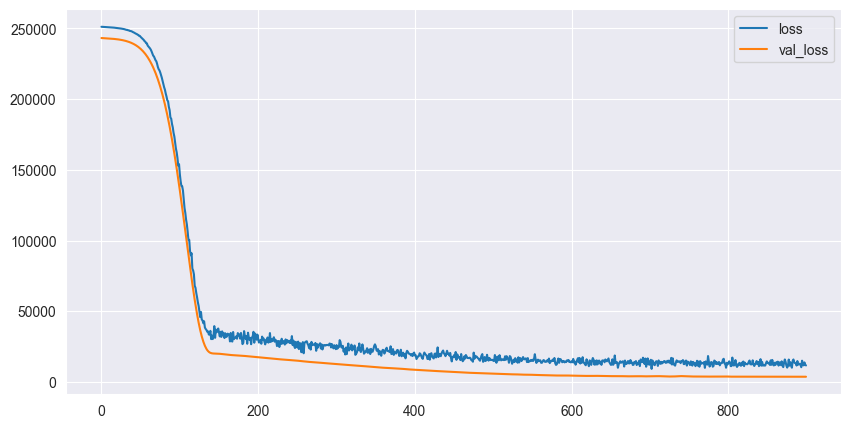

In [799]:
loss_df.plot(figsize=(10,5), kind='line')

In [800]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [801]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [802]:
mean_absolute_error(y_test,predictions)

37.00469970703125

In [803]:
np.sqrt(mean_squared_error(y_test,predictions))

60.864654480159956

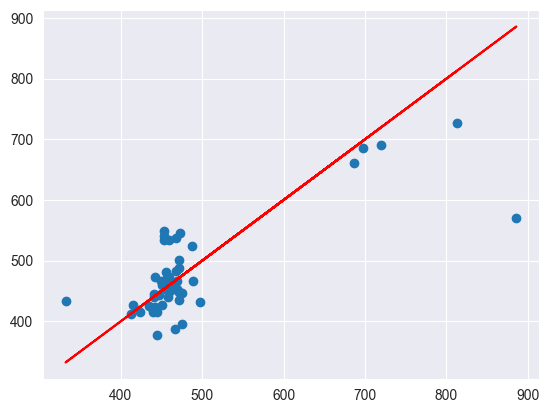

In [804]:
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [805]:
X_test.shape

(52, 5)

<AxesSubplot:ylabel='Density'>

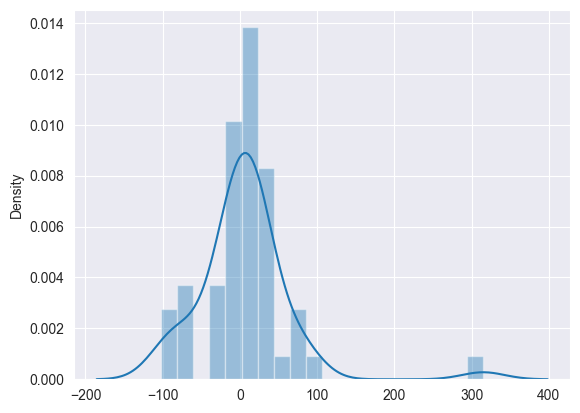

In [806]:
errors = y_test.values.reshape(52, 1) - predictions
sns.distplot(errors)

### Predicting on a brand new data

In [807]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,0,4750,461,1,2021
1,171,3,250,813,1,2021


In [808]:
new_df = pd.DataFrame({'Dno':[173],'IP':[0],'Invites':3250, 'Month':9, 'Year':2022 })
#new_df = df.drop('Lowest_CRS',axis=1).iloc[0]

In [809]:
new_df = scaler.transform(new_df.values.reshape(-1, 5))

In [810]:
new_df

array([[1.00588235, 0.        , 0.64154035, 0.72727273, 1.16666667]])

In [811]:
model.predict(new_df)

1/1 [==============================] - 0s 32ms/step


array([[405.3153]], dtype=float32)

In [812]:
pred_df = pd.DataFrame(predictions, columns=['Predictions'])
pred_df['Actual'] = y_test.values

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

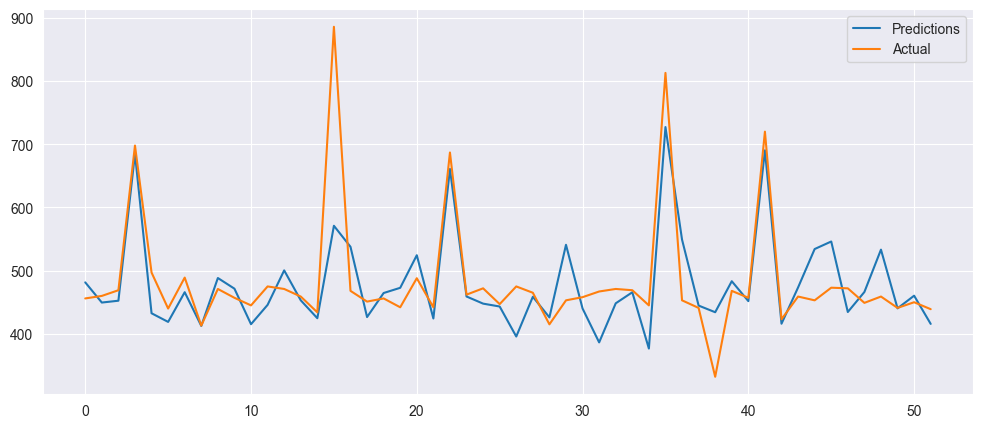

In [813]:
plt.figure()
pred_df.plot(figsize=(12,5))

In [822]:
model.save_weights('LowestCRS.h5')

In [819]:
model.save('full_model.h5')

In [820]:
'Sja'

'Sja'

In [821]:
pwd

'D:\\Learnings\\AdvancedMlDl\\Projects\\Weather Forecast'